In [1]:
import tensorflow as tf
from tensorflow import keras
import cv2
import numpy as np
import os

In [4]:
IMAGE_SIZE = (100,100)
def load_images():
    image = []
    label = []
    image_path = []
    TRAIN_FOLDER_PATH = "D:/Programming/OPSI/images/train" #"C:/Users/pc/Documents/pythonProjects/OPSI/images/train"  #ada sebanyak 3421 image
    TEST_FOLDER_PATH = "D:/Programming/OPSI/images/test" #"C:/Users/pc/Documents/pythonProjects/OPSI/images/test" #ada sebanyak 1871 image, total ada 5292 images
    for folder_name in os.listdir(TRAIN_FOLDER_PATH):
        for filename in os.listdir(os.path.join(TRAIN_FOLDER_PATH,folder_name)):
            print(filename)
            subfolder_path = os.path.join(folder_name,filename)
            img = cv2.imread(os.path.join(TRAIN_FOLDER_PATH,subfolder_path))
            img = cv2.resize(img,IMAGE_SIZE)
            image.append(img)
            label.append(folder_name)
            image_path.append(os.path.join(TRAIN_FOLDER_PATH,subfolder_path))

    for folder_name in os.listdir(TEST_FOLDER_PATH):
        for filename in os.listdir(os.path.join(TEST_FOLDER_PATH,folder_name)):
            print(filename)
            subfolder_path = os.path.join(folder_name,filename)
            img = cv2.imread(os.path.join(TEST_FOLDER_PATH,subfolder_path))
            img = cv2.resize(img,IMAGE_SIZE)
            image.append(img)
            label.append(folder_name)
            image_path.append(os.path.join(TEST_FOLDER_PATH,subfolder_path))
    image = np.array(image)
    return image,label, image_path

In [5]:
image,label, image_path = load_images()

adenocarcinoma_left lower lobe T2 N0 M0 Ib (1).png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (10).png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (100).png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (101).png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (102).png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (103).png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (104).png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (105).png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (106).png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (107).png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (108) - Copy.png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (108).png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (109) - Copy.png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (109).png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (11).png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (110) - Copy.png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (110).png
adenocarcinoma_left lower lobe T2 N0 M0 Ib (111) - Copy.png
adenocarcinoma_left lo

In [6]:
print(len(image)) #banyaknya data gambar untuk train session
print(label)
print(len(label))
image.shape

7871
['Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adenocarcinoma (Ganas)', 'Adeno

(7871, 100, 100, 3)

In [7]:
# i = 5000
# print(label[i])
# cv2.imshow('image',image[i])
# cv2.waitKey(0)

In [8]:
from sklearn.preprocessing import OneHotEncoder
label_encoder = OneHotEncoder()
new_label = np.reshape(label,(-1,1))
new_label = label_encoder.fit_transform(new_label).toarray()

In [9]:
print(new_label)
print(len(new_label [0]))
print(new_label .shape)
# new_label = np.resize(new_label,(5292,10))
print(new_label.shape)
new_label[0]

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]
6
(7871, 6)
(7871, 6)


array([1., 0., 0., 0., 0., 0.])

In [10]:
from keras.preprocessing.image import ImageDataGenerator
augmentation = ImageDataGenerator(
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(image,new_label,test_size=0.2,random_state=3)

In [12]:
# model_xception = keras.applications.xception.Xception(weights='imagenet',include_top=False,input_tensor=keras.layers.Input(shape=(100,100,3)))

# for layer in model_xception.layers:
#     layer.trainable = False
# print(model_xception.summary())

In [13]:
# model_lenet5 = keras.Sequential()
# model_lenet5.add(keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=(100,100, 3)))
# model_lenet5.add(keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2))
# model_lenet5.add(keras.layers.Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
# model_lenet5.add(keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2))
# model_lenet5.add(keras.layers.Flatten())

# model_lenet5.add(keras.layers.Dense(units=120, activation='relu'))
# model_lenet5.add(keras.layers.Dense(units=84, activation='relu'))
# model_lenet5.add(keras.layers.Dense(units=6, activation='softmax'))
# model_lenet5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model_lenet5.summary()

In [14]:
efficientnetb0 = keras.applications.EfficientNetB0(weights='imagenet',include_top=False,input_tensor=keras.layers.Input(shape=(100,100,3)))

for layer in efficientnetb0.layers:
    layer.trainable = False
    
print(efficientnetb0.summary())

16705208/16705208 [==============================] - 105s 6us/step
Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 100, 100, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 100, 100, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Resc

In [1]:
model_efficientnetb0 = keras.Sequential()
model_efficientnetb0.add(efficientnetb0)
model_efficientnetb0.add(keras.layers.Flatten())

model_efficientnetb0.add(keras.layers.Dense(units=6, activation='softmax'))

model_efficientnetb0.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model_efficientnetb0.summary()

NameError: name 'keras' is not defined

In [16]:
model_efficientnetb0.fit(augmentation.flow(x_train, y_train, batch_size=32),validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
197/197 [==============================] - 51s 240ms/step - loss: 0.7321 - accuracy: 0.7457 - val_loss: 0.3003 - val_accuracy: 0.8952
Epoch 2/10
197/197 [==============================] - 47s 238ms/step - loss: 0.3970 - accuracy: 0.8585 - val_loss: 0.5957 - val_accuracy: 0.8229
Epoch 3/10
197/197 [==============================] - 47s 236ms/step - loss: 0.3878 - accuracy: 0.8720 - val_loss: 0.4642 - val_accuracy: 0.8527
Epoch 4/10
197/197 [==============================] - 57s 288ms/step - loss: 0.2898 - accuracy: 0.9033 - val_loss: 0.1401 - val_accuracy: 0.9537
Epoch 5/10
197/197 [==============================] - 48s 244ms/step - loss: 0.2618 - accuracy: 0.9128 - val_loss: 0.1677 - val_accuracy: 0.9562
Epoch 6/10
197/197 [==============================] - 47s 241ms/step - loss: 0.3215 - accuracy: 0.9031 - val_loss: 0.2993 - val_accuracy: 0.9035
Epoch 7/10
197/197 [==============================] - 47s 239ms/step - loss: 0.2035 - accuracy: 0.9314 - val_loss: 0.4074 - val_ac

In [17]:
model_efficientnetb0.evaluate(x_test,y_test)

50/50 [==============================] - 13s 249ms/step - loss: 0.1492 - accuracy: 0.9537


[0.1492258906364441, 0.9536507725715637]

In [27]:
IMAGE_SIZE = (100,100)
def valid_load_images():
    image = []
    label = []
    image_path = []
    VALID_FOLDER_PATH = "D:/Programming/OPSI/images/valid"#"C:/Users/pc/Documents/pythonProjects/OPSI/images/valid" #ada sebanyak 3421 image
    for folder_name in os.listdir(VALID_FOLDER_PATH):
        for filename in os.listdir(os.path.join(VALID_FOLDER_PATH,folder_name)):
            print(filename)
            subfolder_path = os.path.join(folder_name,filename)
            img = cv2.imread(os.path.join(VALID_FOLDER_PATH,subfolder_path))
            img = cv2.resize(img,IMAGE_SIZE)
            image.append(img)
            label.append(folder_name)
            image_path.append(os.path.join(VALID_FOLDER_PATH,subfolder_path))
    image = np.array(image)
    return image,label

In [28]:
valid_image, valid_label = valid_load_images()

000108 (7)(1).png
000108 (7).png
000108 (8)(1).png
000108 (8).png
000109 (3)(1).png
000109 (3).png
000109 (4)(1).png
000109 (4).png
000109 (8)(1).png
000109 (8).png
000110 (7)(1).png
000110 (7).png
000111 (2)(1).png
000111 (2).png
000112 (2)(1).png
000112 (2).png
000112 (9)(1).png
000112 (9).png
000113 (3)(1).png
000113 (3).png
000113(1).png
000113.png
000114 (10)(1).png
000114 (10).png
000114(1).png
000114.png
000115 (2)(1).png
000115 (2).png
000115 (5)(1).png
000115 (5).png
000115 (9)(1).png
000115 (9).png
000115(1).png
000115.png
000116 (3)(1).png
000116 (3).png
000116 (5)(1).png
000116 (5).png
000116 (8)(1).png
000116 (8).png
000116 (9)(1).png
000116 (9).png
000117 (6)(1).png
000117 (6).png
000117(1).png
000117.png
Malignant case (541).jpg
Malignant case (542).jpg
Malignant case (543).jpg
Malignant case (544).jpg
Malignant case (545).jpg
Malignant case (546).jpg
Malignant case (547).jpg
Malignant case (548).jpg
Malignant case (549).jpg
Malignant case (550).jpg
Malignant case (551).

In [29]:
prediction_val_raw = model_efficientnetb0.predict(valid_image)

7/7 [==============================] - 2s 246ms/step


In [30]:
jenis_kanker = ["Adenocarcinoma (Ganas)","Kanker Ganas","Kanker Jinak", "Sehat", "Sel Besar Karsinoma (Ganas)", "Sel Kanker Skuamous (Ganas)"]
banyak_kesalahan = 0
for i in  range(len(prediction_val_raw)):
    if jenis_kanker[np.argmax(prediction_val_raw[i])] != valid_label[i]:
        banyak_kesalahan += 1
        print("DATA KE-", i)
        # print("Prediksi: " + jenis_kanker[np.argmax(prediction_val_raw[i])])
        # print("Kunci Jawaban :", valid_label[i])
        # print()
print(banyak_kesalahan)

DATA KE- 26
DATA KE- 27
DATA KE- 40
DATA KE- 41
DATA KE- 42
DATA KE- 43
DATA KE- 44
DATA KE- 45
DATA KE- 47
DATA KE- 49
DATA KE- 72
DATA KE- 73
DATA KE- 74
DATA KE- 120
DATA KE- 121
DATA KE- 144
DATA KE- 145
DATA KE- 146
DATA KE- 147
DATA KE- 150
DATA KE- 151
DATA KE- 154
DATA KE- 155
DATA KE- 156
DATA KE- 157
DATA KE- 160
DATA KE- 161
DATA KE- 204
DATA KE- 205
29


In [31]:
print("Akurasi pada sesi validasi adalah " + str((len(valid_image) - banyak_kesalahan) / len(valid_image)))

Akurasi pada sesi validasi adalah 0.8644859813084113


In [32]:
from sklearn.preprocessing import OneHotEncoder
label_encoder = OneHotEncoder()
valid_label_index = np.reshape(valid_label,(-1,1))
valid_label_index = label_encoder.fit_transform(valid_label_index).toarray()
np.argmax(valid_label_index[50])

1

In [33]:
prediction_val_index = []
valid_label_indexs = []
for i in range (len(prediction_val_raw)):
    prediction_val_index.append(np.argmax(prediction_val_raw[i]))

for j in range(len(valid_label_index)):
    valid_label_indexs.append(np.argmax(valid_label_index[j]))

In [34]:
print(len(prediction_val_index))
len(valid_label_indexs)

214


214

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(valid_label_indexs,prediction_val_index)
print(cm)

[[38  0  0  0  4  4]
 [ 1 19  0  0  0  1]
 [ 0  0  6  3  0  0]
 [ 0  0  2 64  0  0]
 [ 6  0  0  0 30  6]
 [ 2  0  0  0  0 28]]


Text(0.5, -4.750000000000005, 'Prediction')

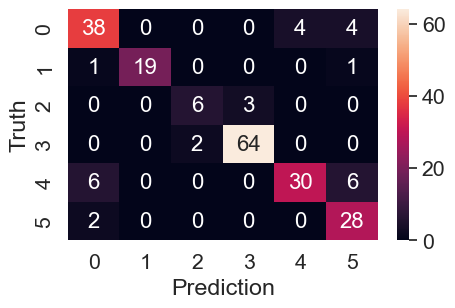

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (5,3))
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size
plt.ylabel('Truth')
plt.xlabel("Prediction")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(valid_label_indexs,prediction_val_index))

In [15]:
prediction = lenet_xception.predict(x_test)
prediction

50/50 [==============================] - 13s 243ms/step


array([[1.1789023e-21, 1.6899385e-19, 1.2019737e-01, 8.7980258e-01,
        4.4939356e-38, 1.0867627e-24],
       [2.1695758e-32, 5.2354773e-13, 1.7141634e-01, 8.2858372e-01,
        6.1435070e-30, 8.7829658e-22],
       [4.4950989e-36, 0.0000000e+00, 1.0000000e+00, 7.9497988e-23,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [3.1489457e-18, 9.9999738e-01, 1.8024307e-06, 8.3230407e-07,
        6.9516444e-21, 3.3765485e-25],
       [4.0322302e-26, 8.4441419e-14, 1.0000000e+00, 7.5706236e-10,
        4.2517384e-35, 3.0802781e-36],
       [1.1280779e-07, 4.8780218e-28, 3.8072428e-23, 1.9890065e-06,
        6.5155882e-01, 3.4843913e-01]], dtype=float32)

In [16]:
jenis_kanker = ["Adenocarcinoma","Kanker Ganas","Kanker Jinak", "Sehat", "Sel Besar Karsinoma", "Sel Besar Skuamous"]
banyak_kesalahan = 0
for i in range(len(prediction)):
    if jenis_kanker[np.argmax(prediction[i])] != jenis_kanker[np.argmax(y_test[i])]:
        banyak_kesalahan += 1
        print("data ke :",  i+1)
        print("Prediction : " + jenis_kanker[np.argmax(prediction[i])])
        print("Kunci Jawaban: ",jenis_kanker[np.argmax(y_test[i])])
        print()
print(banyak_kesalahan)

data ke : 11
Prediction : Sehat
Kunci Jawaban:  Kanker Ganas

data ke : 24
Prediction : Sehat
Kunci Jawaban:  Sel Besar Skuamous

data ke : 25
Prediction : Sehat
Kunci Jawaban:  Sel Besar Skuamous

data ke : 40
Prediction : Adenocarcinoma
Kunci Jawaban:  Sel Besar Skuamous

data ke : 41
Prediction : Sehat
Kunci Jawaban:  Kanker Ganas

data ke : 42
Prediction : Kanker Jinak
Kunci Jawaban:  Sehat

data ke : 44
Prediction : Kanker Jinak
Kunci Jawaban:  Kanker Ganas

data ke : 58
Prediction : Sehat
Kunci Jawaban:  Kanker Ganas

data ke : 61
Prediction : Sehat
Kunci Jawaban:  Sel Besar Karsinoma

data ke : 66
Prediction : Kanker Jinak
Kunci Jawaban:  Sehat

data ke : 68
Prediction : Sehat
Kunci Jawaban:  Kanker Ganas

data ke : 75
Prediction : Sel Besar Skuamous
Kunci Jawaban:  Adenocarcinoma

data ke : 78
Prediction : Sehat
Kunci Jawaban:  Kanker Ganas

data ke : 89
Prediction : Sehat
Kunci Jawaban:  Kanker Ganas

data ke : 90
Prediction : Kanker Jinak
Kunci Jawaban:  Sehat

data ke : 94
P

In [17]:
print(len(y_test))
banyak_kesalahan

1575


365

In [20]:
akurasi_training = lenet_xception.evaluate(x_train,y_train)[1]
akurasi_testing = lenet_xception.evaluate(x_test,y_test)[1]

50/50 [==============================] - 12s 242ms/step - loss: 2.8393 - accuracy: 0.7683


In [21]:
print("Akurasi training session :",akurasi_training)
print("Akurasi testing session :",akurasi_testing)

Akurasi training session : 0.8011435866355896
Akurasi testing session : 0.7682539820671082
